# Neural Network From Scratch

### Step 1: Create dataset

In [12]:
# Creating data set
 
# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
 
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

### Step 2: Visualization of the dataset

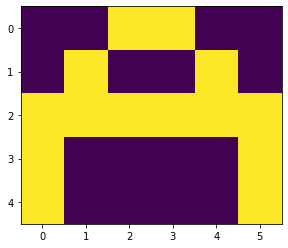

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, ploting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

### Step 3: Convert dataset list to a numpy array

In [14]:

# converting data and labels into numpy array
 
"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""
 
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
                                np.array(c).reshape(1, 30)]
 
 
# Labels are also converted into NumPy array
y = np.array(y)
 
 
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


### Step 4: Define architecture of the deep neural network

Number of layers and number of nodes in each layer

1st layer: Input layer(1, 30)

2nd layer: Hidden layer (1, 5)

3rd layer: Output layer(3, 3)

### Step 5: Declaring and defining all the function to build deep neural network. 

In [18]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# out put of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# output of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()


### Step 6: Initialize the weights

Neural network has 3 layeres so there will be 2 weight matrixes associated

In [19]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[ 9.79553055e-02  2.20490593e+00  1.20643927e+00 -3.06156833e-01
   1.24123720e-01]
 [ 4.22138131e-01  9.87573785e-02  4.70745051e-01  6.49807253e-01
   1.82694479e+00]
 [-7.89248576e-01  6.06601104e-01  3.59860320e-01 -9.51448846e-01
  -6.68449796e-01]
 [-6.53724366e-01  2.34981984e+00 -8.81558384e-01  4.16501337e-01
   1.06299950e+00]
 [ 1.29012072e+00 -1.27475193e-02  8.26214270e-01 -9.04616795e-01
  -1.10254416e-01]
 [-1.08209108e+00 -1.23003432e+00  2.50337058e+00  3.90880878e-01
   1.50783714e+00]
 [-2.90780775e-01 -1.31899251e-01  1.05375565e-01  8.84629277e-01
  -1.13788737e+00]
 [ 1.04596167e+00 -1.38235216e+00 -1.31486238e-01  1.41281624e+00
  -1.20294487e+00]
 [-6.19721155e-01  1.09527044e+00  1.33252245e+00  2.46142476e-01
  -1.71022654e+00]
 [-1.50648896e+00  1.06184081e+00 -4.81395645e-01  1.64426530e+00
  -5.71655590e-01]
 [-1.36606846e+00  1.46703294e+00  2.43781067e-03  1.42552588e+00
   4.33131197e-01]
 [-7.19182787e-01 -2.12393334e-01 -2.34338247e-01  2.57257628e+00

### Step 7: Training the Model

In [20]:

"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""
 
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 77.39943915413102
epochs: 2 ======== acc: 77.96884585510226
epochs: 3 ======== acc: 78.5576630630127
epochs: 4 ======== acc: 79.1639704757484
epochs: 5 ======== acc: 79.78371738651452
epochs: 6 ======== acc: 80.41156079867756
epochs: 7 ======== acc: 81.0415539789041
epochs: 8 ======== acc: 81.66769389854598
epochs: 9 ======== acc: 82.28433807278171
epochs: 10 ======== acc: 82.88649924592794
epochs: 11 ======== acc: 83.4700273759678
epochs: 12 ======== acc: 84.03169267439714
epochs: 13 ======== acc: 84.56918832650045
epochs: 14 ======== acc: 85.08107423289337
epochs: 15 ======== acc: 85.56668251642652
epochs: 16 ======== acc: 86.02600220642039
epochs: 17 ======== acc: 86.45955602249064
epochs: 18 ======== acc: 86.8682780980827
epochs: 19 ======== acc: 87.25339863131194
epochs: 20 ======== acc: 87.61633975691956
epochs: 21 ======== acc: 87.95862580371033
epochs: 22 ======== acc: 88.28180996262755
epochs: 23 ======== acc: 88.58741803302796
epochs: 24 ======== acc: 

### Step 8 : Plotting the graphs of loss and accuracy with respect to number of epochs(Iteration)

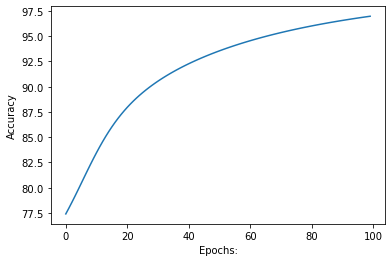

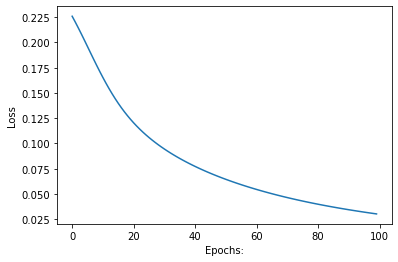

In [21]:
import matplotlib.pyplot as plt1
 
# ploting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
 
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [22]:
# the trained weights are
print(w1, "\n", w2)

[[ 0.09795531  2.20490593  1.20643927 -0.30615683  0.12412372]
 [ 0.61324151  0.03857319  0.63747637  0.70698074  1.86176787]
 [-0.60350742  0.29046662  0.23288651 -0.8580115  -0.60502369]
 [-0.46798321  2.03368536 -1.00853219  0.50993868  1.12642561]
 [ 1.4812241  -0.07293171  0.99294559 -0.84744331 -0.07543133]
 [-1.08209108 -1.23003432  2.50337058  0.39088088  1.50783714]
 [-0.29078077 -0.13189925  0.10537556  0.88462928 -1.13788737]
 [ 1.23170283 -1.69848665 -0.25846005  1.50625358 -1.13951877]
 [-0.61972116  1.09527044  1.33252245  0.24614248 -1.71022654]
 [-1.50648896  1.06184081 -0.48139565  1.6442653  -0.57165559]
 [-1.80711652  1.26012239 -0.10963674  1.87024869  0.45217642]
 [-0.71918279 -0.21239333 -0.23433825  2.57257628  1.41317129]
 [-0.73323664 -1.98087589 -0.46590247  0.82542028  2.25380025]
 [ 0.76528363 -0.24159186  1.22763518 -0.68538908  0.02935534]
 [-1.21917782 -0.48576871  0.613495   -0.01539334 -0.73112862]
 [-1.72348478  1.03279372  0.12250731  1.08698599  1.20

### Step 9: Making the Prediction

Image is of letter B.


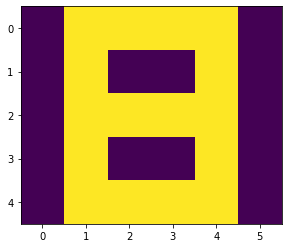

In [23]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)